# Social Media Final Project

##  Abdel

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
#from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models  #
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Load the dataset
donald = pd.read_csv("data/Donald Trumps Facebook Statuses.csv")
donald

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,Beautiful evening in Wisconsin- THANK YOU for ...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,10/17/2016 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0
1,153080620724_10157914483265725,The State Department's quid pro quo scheme pro...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0
2,153080620724_10157913199155725,Crooked Hillary's State Department colluded wi...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0
3,153080620724_10157912962325725,"JournoCash: Media gives $382,000 to Clinton, $...","JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,10/17/2016 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0
4,153080620724_10157912187170725,"Exclusive: ""O'Keefe Video Sting Exposes 'Bird-...",O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,10/17/2016 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,153080620724_86348879816,- Check out the official website for Donald Tr...,NaN,status,NaN,4/20/2009 8:44:07,152.0,43.0,3.0,152.0,0.0,0.0,0.0,0.0,0.0
4536,153080620724_96770601006,#NAME?,NaN,status,NaN,4/19/2009 17:18:16,140.0,111.0,6.0,140.0,0.0,0.0,0.0,0.0,0.0
4537,153080620724_85435041544,Follow Donald J. Trump on Twitter: http://twit...,NaN,status,NaN,4/16/2009 17:44:23,137.0,60.0,2.0,137.0,0.0,0.0,0.0,0.0,0.0
4538,153080620724_71666378535,Watch Donald J. Trump on Larry King Live: http...,NaN,status,NaN,4/16/2009 10:05:34,136.0,66.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Convert status_message to lowercase
donald['status_message']=donald['status_message'].str.lower()

In [5]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [6]:
# Remove stop words
donald['status_message'] = donald['status_message'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
donald

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,beautiful evening wisconsin- thank incredible ...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,10/17/2016 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0
1,153080620724_10157914483265725,state department's quid pro quo scheme proves ...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0
2,153080620724_10157913199155725,crooked hillary's state department colluded fb...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0
3,153080620724_10157912962325725,"journocash: media gives $382,000 clinton, $14,...","JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,10/17/2016 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0
4,153080620724_10157912187170725,"exclusive: ""o'keefe video sting exposes 'bird-...",O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,10/17/2016 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,153080620724_86348879816,- check official website donald trump's new bo...,NaN,status,NaN,4/20/2009 8:44:07,152.0,43.0,3.0,152.0,0.0,0.0,0.0,0.0,0.0
4536,153080620724_96770601006,#name?,NaN,status,NaN,4/19/2009 17:18:16,140.0,111.0,6.0,140.0,0.0,0.0,0.0,0.0,0.0
4537,153080620724_85435041544,follow donald j. trump twitter: http://twitter...,NaN,status,NaN,4/16/2009 17:44:23,137.0,60.0,2.0,137.0,0.0,0.0,0.0,0.0,0.0
4538,153080620724_71666378535,watch donald j. trump larry king live: http://...,NaN,status,NaN,4/16/2009 10:05:34,136.0,66.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0


#  Remove punctuations


In [7]:
# remove non-alphanumeric
donald['status_message']=donald['status_message'].str.replace(r'[^\w\s]+', ' ',regex=True)
donald

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,beautiful evening wisconsin thank incredible ...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,10/17/2016 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0
1,153080620724_10157914483265725,state department s quid pro quo scheme proves ...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0
2,153080620724_10157913199155725,crooked hillary s state department colluded fb...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0
3,153080620724_10157912962325725,journocash media gives 382 000 clinton 14 ...,"JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,10/17/2016 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0
4,153080620724_10157912187170725,exclusive o keefe video sting exposes bird ...,O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,10/17/2016 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,153080620724_86348879816,check official website donald trump s new bo...,NaN,status,NaN,4/20/2009 8:44:07,152.0,43.0,3.0,152.0,0.0,0.0,0.0,0.0,0.0
4536,153080620724_96770601006,name,NaN,status,NaN,4/19/2009 17:18:16,140.0,111.0,6.0,140.0,0.0,0.0,0.0,0.0,0.0
4537,153080620724_85435041544,follow donald j trump twitter http twitter c...,NaN,status,NaN,4/16/2009 17:44:23,137.0,60.0,2.0,137.0,0.0,0.0,0.0,0.0,0.0
4538,153080620724_71666378535,watch donald j trump larry king live http ww...,NaN,status,NaN,4/16/2009 10:05:34,136.0,66.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# remove newline 
donald['status_message']= donald['status_message'].str.replace(r'\n',  '',regex=True)
donald

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,beautiful evening wisconsin thank incredible ...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,10/17/2016 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0
1,153080620724_10157914483265725,state department s quid pro quo scheme proves ...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0
2,153080620724_10157913199155725,crooked hillary s state department colluded fb...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0
3,153080620724_10157912962325725,journocash media gives 382 000 clinton 14 ...,"JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,10/17/2016 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0
4,153080620724_10157912187170725,exclusive o keefe video sting exposes bird ...,O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,10/17/2016 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,153080620724_86348879816,check official website donald trump s new bo...,NaN,status,NaN,4/20/2009 8:44:07,152.0,43.0,3.0,152.0,0.0,0.0,0.0,0.0,0.0
4536,153080620724_96770601006,name,NaN,status,NaN,4/19/2009 17:18:16,140.0,111.0,6.0,140.0,0.0,0.0,0.0,0.0,0.0
4537,153080620724_85435041544,follow donald j trump twitter http twitter c...,NaN,status,NaN,4/16/2009 17:44:23,137.0,60.0,2.0,137.0,0.0,0.0,0.0,0.0,0.0
4538,153080620724_71666378535,watch donald j trump larry king live http ww...,NaN,status,NaN,4/16/2009 10:05:34,136.0,66.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# replace tabs with spaces
donald['status_message']= donald['status_message'].str.replace(r'\t',  ' ',regex=True)
donald

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,beautiful evening wisconsin thank incredible ...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,10/17/2016 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0
1,153080620724_10157914483265725,state department s quid pro quo scheme proves ...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0
2,153080620724_10157913199155725,crooked hillary s state department colluded fb...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0
3,153080620724_10157912962325725,journocash media gives 382 000 clinton 14 ...,"JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,10/17/2016 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0
4,153080620724_10157912187170725,exclusive o keefe video sting exposes bird ...,O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,10/17/2016 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,153080620724_86348879816,check official website donald trump s new bo...,NaN,status,NaN,4/20/2009 8:44:07,152.0,43.0,3.0,152.0,0.0,0.0,0.0,0.0,0.0
4536,153080620724_96770601006,name,NaN,status,NaN,4/19/2009 17:18:16,140.0,111.0,6.0,140.0,0.0,0.0,0.0,0.0,0.0
4537,153080620724_85435041544,follow donald j trump twitter http twitter c...,NaN,status,NaN,4/16/2009 17:44:23,137.0,60.0,2.0,137.0,0.0,0.0,0.0,0.0,0.0
4538,153080620724_71666378535,watch donald j trump larry king live http ww...,NaN,status,NaN,4/16/2009 10:05:34,136.0,66.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0


In [10]:
status_type= donald['status_type']

In [11]:
# Remove stop words
donald['status_message'] = donald['status_message'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
donald

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,beautiful evening wisconsin thank incredible s...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,10/17/2016 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0
1,153080620724_10157914483265725,state department quid pro quo scheme proves co...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0
2,153080620724_10157913199155725,crooked hillary state department colluded fbi ...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0
3,153080620724_10157912962325725,journocash media gives 382 000 clinton 14 000 ...,"JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,10/17/2016 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0
4,153080620724_10157912187170725,exclusive keefe video sting exposes bird doggi...,O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,10/17/2016 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,153080620724_86348879816,check official website donald trump new book t...,NaN,status,NaN,4/20/2009 8:44:07,152.0,43.0,3.0,152.0,0.0,0.0,0.0,0.0,0.0
4536,153080620724_96770601006,name,NaN,status,NaN,4/19/2009 17:18:16,140.0,111.0,6.0,140.0,0.0,0.0,0.0,0.0,0.0
4537,153080620724_85435041544,follow donald j trump twitter http twitter com...,NaN,status,NaN,4/16/2009 17:44:23,137.0,60.0,2.0,137.0,0.0,0.0,0.0,0.0,0.0
4538,153080620724_71666378535,watch donald j trump larry king live http www ...,NaN,status,NaN,4/16/2009 10:05:34,136.0,66.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# remove digits
donald['status_message']= donald['status_message'].str.replace('\d+', '',regex=True)
donald

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,beautiful evening wisconsin thank incredible s...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,10/17/2016 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0
1,153080620724_10157914483265725,state department quid pro quo scheme proves co...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0
2,153080620724_10157913199155725,crooked hillary state department colluded fbi ...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,10/17/2016 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0
3,153080620724_10157912962325725,journocash media gives clinton trump margin,"JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,10/17/2016 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0
4,153080620724_10157912187170725,exclusive keefe video sting exposes bird doggi...,O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,10/17/2016 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,153080620724_86348879816,check official website donald trump new book t...,NaN,status,NaN,4/20/2009 8:44:07,152.0,43.0,3.0,152.0,0.0,0.0,0.0,0.0,0.0
4536,153080620724_96770601006,name,NaN,status,NaN,4/19/2009 17:18:16,140.0,111.0,6.0,140.0,0.0,0.0,0.0,0.0,0.0
4537,153080620724_85435041544,follow donald j trump twitter http twitter com...,NaN,status,NaN,4/16/2009 17:44:23,137.0,60.0,2.0,137.0,0.0,0.0,0.0,0.0,0.0
4538,153080620724_71666378535,watch donald j trump larry king live http www ...,NaN,status,NaN,4/16/2009 10:05:34,136.0,66.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0


# Stemming 


In [13]:
sents = donald['status_message']
sents

0       beautiful evening wisconsin thank incredible s...
1       state department quid pro quo scheme proves co...
2       crooked hillary state department colluded fbi ...
3       journocash media gives   clinton   trump   margin
4       exclusive keefe video sting exposes bird doggi...
                              ...                        
4535    check official website donald trump new book t...
4536                                                 name
4537    follow donald j trump twitter http twitter com...
4538    watch donald j trump larry king live http www ...
4539    watch donald trump good morning america http a...
Name: status_message, Length: 4540, dtype: object

In [14]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
sents = sents.apply(lambda x: x.split())
sents = sents.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [15]:
donald['status_type'].value_counts()

photo                    1539
status                   1177
link                      763
video                     679
event                       1
http://bit.ly/2duCRlw       1
Name: status_type, dtype: int64

In [16]:
import seaborn as sns

### Task 1 bar chart

<AxesSubplot:xlabel='status_type', ylabel='count'>

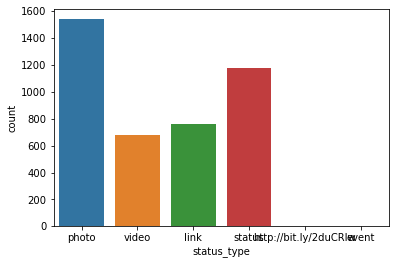

In [17]:
sns.countplot(x='status_type',data=donald)

# Extract year from status_published


In [18]:
# Convert the 'status_published' column to a datetime object
donald['status_published'] = pd.to_datetime(donald['status_published'], errors='coerce')
# Remove any rows with invalid datetime values
donald.dropna(subset=['status_published'], inplace=True)
# Extract the year
donald['year'] = pd.DatetimeIndex(donald['status_published']).year
donald.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
0,153080620724_10157915294545725,beautiful evening wisconsin thank incredible s...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,2016-10-17 20:56:51,6813.0,543.0,359.0,6178.0,572.0,39.0,17.0,0.0,7.0,2016
1,153080620724_10157914483265725,state department quid pro quo scheme proves co...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,2016-10-17 18:00:41,33768.0,3644.0,17653.0,26649.0,487.0,1155.0,75.0,191.0,5211.0,2016
2,153080620724_10157913199155725,crooked hillary state department colluded fbi ...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,2016-10-17 15:34:46,85627.0,8810.0,32594.0,73519.0,2943.0,1020.0,330.0,263.0,7552.0,2016
3,153080620724_10157912962325725,journocash media gives clinton trump margin,"JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,2016-10-17 14:17:24,22696.0,3665.0,5082.0,14029.0,122.0,2091.0,241.0,286.0,5927.0,2016
4,153080620724_10157912187170725,exclusive keefe video sting exposes bird doggi...,O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,2016-10-17 12:03:19,40729.0,4905.0,17087.0,26472.0,178.0,2588.0,154.0,417.0,10922.0,2016


In [19]:
donald2 = donald.sort_values(by=["year"])
donald2 = donald.groupby("year").mean().reset_index()
donald2.head(10)

,year,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2009,253.782609,111.565217,5.086957,253.782609,0.000000,0.000000,0.000000,0.000000,0.000000
1,2010,507.145455,175.927273,6.909091,507.145455,0.000000,0.000000,0.000000,0.000000,0.000000
2,2011,1140.165138,441.522936,55.449541,1140.165138,0.000000,0.000000,0.000000,0.000000,0.000000
3,2012,10847.239837,1394.239837,489.731707,10847.239837,0.000000,0.000000,0.000000,0.000000,0.000000
4,2013,9496.136000,873.132000,4194.928000,9496.136000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2014,16909.708487,1302.335793,2206.959410,16909.708487,0.000000,0.000000,0.000000,0.000000,0.000000
6,2015,68089.000000,7012.882707,7244.327820,68089.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2016,70930.127135,6205.585221,9875.285260,65795.704410,3061.605085,276.231228,670.613826,214.657132,901.527215


In [20]:
Year = donald2['year']
Like = donald2['num_likes']
Love = donald2['num_loves']
Sad = donald2['num_sads']
Angry = donald2['num_angrys']

### Task 2 line graphs

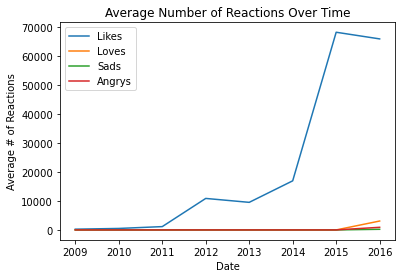

In [21]:
import matplotlib.pyplot as plt

# Create a line chart using the data
plt.plot([str(d) for d in Year], Like, label='Likes')
plt.plot([str(d) for d in Year], Love, label='Loves')
plt.plot([str(d) for d in Year], Sad, label='Sads')
plt.plot([str(d) for d in Year], Angry, label='Angrys')
# Add a title and axis labels
plt.title('Average Number of Reactions Over Time')
plt.xlabel('Date')
plt.ylabel('Average # of Reactions')

# Add a legend and show the chart
plt.legend()
plt.show()

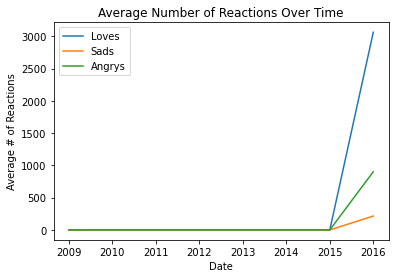

In [22]:
# Create separate line graph excluding likes to better view other reactions
plt.plot([str(d) for d in Year], Love, label='Loves')
plt.plot([str(d) for d in Year], Sad, label='Sads')
plt.plot([str(d) for d in Year], Angry, label='Angrys')

plt.title('Average Number of Reactions Over Time')
plt.xlabel('Date')
plt.ylabel('Average # of Reactions')

plt.legend()
plt.show()

### Task 3: What are the top reactions expressed by Trump's Facebook audience?

The top reactions expressed by Trump's Facebook audience were most definitely likes. In second place, at a fraction of the average count of likes is loves, where this reaction among several others were only used in 2016 and onwards."

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn. feature_extraction. text import CountVectorizer
class SklearnTopicModels(object):
    def _init_(self, n_topics=50):
        """"
        n topics is the desired number of topics
        """
        self.n_topics = n_topics
        self.model = Pipeline([
            ('norm', TextNormalizer ()),
            ('vect', CountVectorizer (tokenizer=identity,
                                      preprocessor=None, lowercase=False)),
            ('model', LatentDirichletAllocation(n_topics=self.n_topics)),
])

In [24]:
def fit_transform(self, sents):
    self.model.fit_transform(sents)
    return self.model

In [25]:
fit_transform

<function __main__.fit_transform(self, sents)>

In [26]:
from gensim.models import Phrases

In [27]:
#Convert into a list
message = donald['status_message'].tolist()

In [28]:
bigram_model = Phrases(message)

In [29]:
trigram_model = Phrases(bigram_model[message], min_count=1)

In [30]:
message = list(trigram_model[bigram_model[message]])

In [31]:
from gensim import corpora

In [32]:
# Split the message into lists of words
message = [d.split() for d in message]

In [33]:
# Create a dictionary_LDA of unique word
dictionary_LDA = corpora.Dictionary(message)

In [34]:
dictionary_LDA.filter_extremes(no_below=3)

In [35]:
# Convert the message into bag-of-words by Dictionary
document = [dictionary_LDA.doc2bow(w) for w in message]

In [36]:
from gensim import models
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

# LDA MODEL


In [37]:
num_topics = 10
LDA_Model = models.LdaModel(document, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

In [38]:
for i,topic in LDA_Model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.047*"miss" + 0.044*"com" + 0.040*"http" + 0.037*"trump" + 0.035*"watch" + 0.033*"night" + 0.031*"donald" + 0.030*"sunday" + 0.026*"pm" + 0.025*"season" + 0.023*"live" + 0.020*"tonight" + 0.019*"twitter" + 0.019*"interview" + 0.018*"video" + 0.016*"favorite" + 0.016*"www" + 0.015*"facebook" + 0.015*"time" + 0.015*"read"

1: 0.048*"great" + 0.030*"thank" + 0.030*"america" + 0.026*"make" + 0.024*"new" + 0.023*"trump" + 0.015*"hotel" + 0.013*"support" + 0.011*"get" + 0.011*"vote" + 0.011*"fantastic" + 0.011*"going" + 0.010*"together" + 0.009*"time" + 0.009*"york" + 0.008*"las" + 0.008*"vegas" + 0.008*"last" + 0.007*"am" + 0.007*"day"

2: 0.039*"nan" + 0.020*"obama" + 0.017*"people" + 0.011*"chinese" + 0.010*"name" + 0.010*"trump" + 0.010*"book" + 0.009*"going" + 0.009*"china" + 0.009*"fans" + 0.008*"start" + 0.008*"every" + 0.008*"many" + 0.008*"part" + 0.008*"else" + 0.008*"obamacare" + 0.008*"lead" + 0.008*"even" + 0.008*"mr" + 0.007*"recent"

3: 0.065*"nbc" + 0.028*"usa" + 0.025*"s

In [39]:
topics = [LDA_Model[document[i]] for i in range(len(message))]
topics

[[(1, 0.9947367)],
 [(6, 0.99700725)],
 [(1, 0.02441278),
  (2, 0.23901093),
  (4, 0.031392086),
  (6, 0.51790696),
  (7, 0.09864131),
  (8, 0.087946214)],
 [(2, 0.9823442)],
 [(0, 0.5126838), (2, 0.2741467), (6, 0.20330301)],
 [(5, 0.11148054), (6, 0.720668), (9, 0.16154218)],
 [(2, 0.37612015), (5, 0.15284948), (6, 0.4663935)],
 [(6, 0.9901089)],
 [(6, 0.997105)],
 [(1, 0.7853039), (8, 0.20675234)],
 [(1, 0.5934016), (6, 0.39997476)],
 [(2, 0.39379784), (5, 0.4606102), (7, 0.1369396)],
 [(5, 0.4226154), (6, 0.56749004)],
 [(3, 0.1105141), (6, 0.8806833)],
 [(5, 0.32625872), (6, 0.66762155)],
 [(2, 0.5441178), (6, 0.3200926), (8, 0.12948231)],
 [(0, 0.22476095), (2, 0.4091422), (6, 0.3602987)],
 [(6, 0.9823472)],
 [(5, 0.3389799), (6, 0.49240664), (9, 0.15697895)],
 [(1, 0.99010926)],
 [(1, 0.8279763), (5, 0.16591455)],
 [(6, 0.48082218), (8, 0.4810715)],
 [(0, 0.17427698), (1, 0.806202)],
 [(6, 0.7901359), (8, 0.19858661)],
 [(5, 0.4610479), (6, 0.5317422)],
 [(1, 0.9709642)],
 [(2, 

In [40]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [41]:
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

### Task 4 bar plot

<AxesSubplot:>

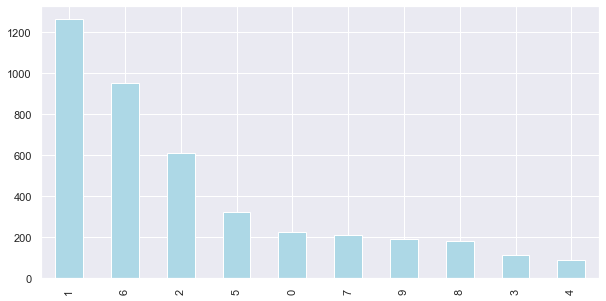

In [42]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [43]:
doc_topic_probs = []
for doc in document:
    doc_topic_prob = LDA_Model.get_document_topics(doc, minimum_probability=0)
    doc_topic_probs.append(doc_topic_prob)

In [44]:
topics = []
for doc_topic_prob in doc_topic_probs:
    topic_id, prob = max(doc_topic_prob, key=lambda x: x[1])
    topics.append(topic_id)

In [45]:
topics.append(None) # add element to the topics list
donald['topics'] = topics

In [46]:
donald.groupby('topics')[['num_likes', 'num_sads']].agg('mean')

,num_likes,num_sads
topics,,
0.0,28113.592105,51.478070
1.0,66012.344637,121.653785
2.0,29808.595082,48.018033
3.0,55212.946903,180.203540
4.0,49168.120879,214.670330
5.0,47979.185535,54.169811
6.0,62606.399579,218.390116
7.0,48108.693780,131.511962
8.0,60985.469613,237.071823


### Task 4 Continued: Can you tell if fans are particularly happy/upset about the topics?

Yes, judging by the significant difference in the number of likes to the number of sad reactions for each topic, it can be concluded that Trump's Facebook audience and by extension, his fans really enjoy what he has to say for just about every topic catalogued in this dataset.

In [47]:
shares_topic = np.zeros((len(donald), LDA_Model.num_topics))
for i, doc in enumerate(document):
    for topic, prob in LDA_Model.get_document_topics(doc):
        shares_topic[i][topic] = prob
donald["shares_topic"] = shares_topic.argmax(axis=1)

In [48]:
top_shares_topics = donald.groupby("shares_topic").agg({"num_shares": "sum"}).sort_values("num_shares", ascending=False)
pprint(top_shares_topics)

              num_shares
shares_topic            
6             11659572.0
1              9704953.0
2              2334481.0
8              1754572.0
5              1653154.0
3              1323573.0
7              1217981.0
0               778101.0
9               647911.0
4               373223.0


### Task 5: What are the themes/topics/words that generated a lot of shares?

Topic 6 was the topic that results in the most number of shares. This is followed by topics 1 and then 2, with a dramatic decrease in number of shares between topics 1 and 2 at almost one quarter the number of shares of topic 1 for topic 2.

In [49]:
reactions_topic = np.zeros((len(donald), LDA_Model.num_topics))
for i, doc in enumerate(document):
    for topic, prob in LDA_Model.get_document_topics(doc):
        reactions_topic[i][topic] = prob
donald["reactions_topic"] = reactions_topic.argmax(axis=1)

In [50]:
top_reactions_topics = donald.groupby("reactions_topic").agg({"num_reactions": "sum"}).sort_values("num_reactions", ascending=False)
pprint(top_reactions_topics)

                 num_reactions
reactions_topic               
1                   88389372.0
6                   63948180.0
2                   19166874.0
5                   16008667.0
8                   11914025.0
7                   10382163.0
0                    6651733.0
3                    6541381.0
9                    6010946.0
4                    4585805.0


### Task 6: What are the themes/topics/words that generated a lot of reactions?

Topic 1 generated the most number of reactions. This is followed by topics 6 and 2. Again, there is a noticeable decrease in the count of reactions between topics 6 and 2, as topic 2 has about a third of the number of reactions that topic 6 has.